# Homework 4


### 1. Генерация случайных величин с заранее заданной ковариационной матрицей.



Разложение Холецкого используется для генерации коррелированных между собой случайных величин. Проще говоря, когда есть какой-то набор независимых случайных величин и ковариационная матрица. Как из этого получить набор случайных величин, имеющих такую ковариационную матрицу ?

Это нужно как для моделирования случайных сигналов и физических процессов, так и в качестве вспомогательного элемента других вычислительных методов (Монте-Карло).
Решение этой задачи делается с помощью разложения Холецкого. Алгоритм заключается в следующем:
1. Осуществить разложение Холецкого ковариационной матрицы: $\boldsymbol{\Sigma}=\mathbf{A} \mathbf{A}^T$
2. Сгенерировать случайный вектор $\mathbf{z}$, компонентами которого являются независимые случайные величины с нормальным распределением

3. Решением поставленной задачи будет вектор:
$$
\mathbf{x}=\mathbf{m}+\mathbf{A} \mathbf{z}
$$
Здесь $\mathbf{m}$ - это постоянный вектор, составленный из математических ожиданий компонент вектора $\mathbf{z}$.

Напишите функцию, которая в качестве входного параметра берёт ковариационную матрицу, а возвращает набор случайных величин, действуя по описанному выше алгоритму.


### 2. Обработка экспериментальных данных..

1. Обработайте какую-нибудь лабораторную работу (например, из курса общей физики или просто из папки на диске), требующую проведения прямой по экспериментально полученным точкам. Для решения задачи регрессии рекомендуется использовать библиотеку scikit-learn (sklearn) или scipy.

2. Создайте прямую с шумом и аналогично обработайте данные.

В обоих пунктах нужно построить график, на который будут нанесены точки и прямая среднеквадратической регрессии.

Данные можно сформировать следующим образом:

- ####  Проверка закона Стефана-Больцмана
​
Направив пирометр на нить лампы накаливания, после увеличим накал нити и будем измерять пирометром яркостную температуру, протекающий ток и напряжение. Вычислим соответствующие термодинамическую температуру и потребляемую мощность нити лампы.
​
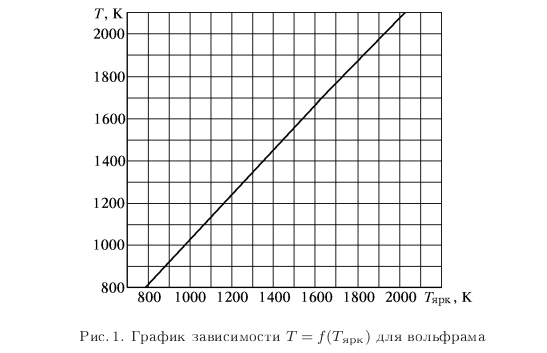

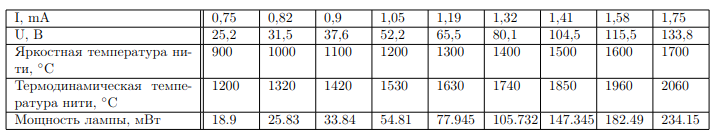

$\Delta T_{ярк} = 1 ^0C$ (единица наим. разряда),
$\Delta T = 10 ^0C$ (точность снятия значений),
$\Delta I = 0,01 А$ (единица наим. разряда),
$\Delta U = 0,1 B$ (единица наим. разряда)

Для проверки закона Стефана-Больцмана построим в логарифмическом масштабе график зависимости 

$W = \mathcal{E}_T B T^n$, т.е. $lnW = ln(\mathcal{E}_T B) + n\cdot lnT$, 

где B = $S \sigma$, $\sigma = 5,67\cdot 10^{-12}\frac{\text{Вт}}{\text{см}^2\text{К}^4}$  - постоянная Стефана-Больцмана, $S = 0,36 \text{см}^2$ - эффективная площадь излучающей поверхности нити.

$\mathcal{E}_T$ для вольфрама возьмем из таблицы: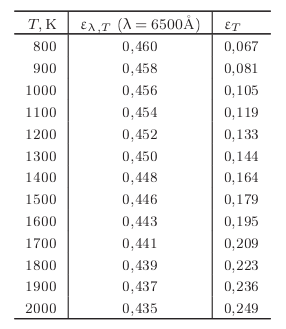

[18.9, 25.83, 33.84, 54.81, 77.945, 105.732, 147.345, 182.49, 234.15000000000003]


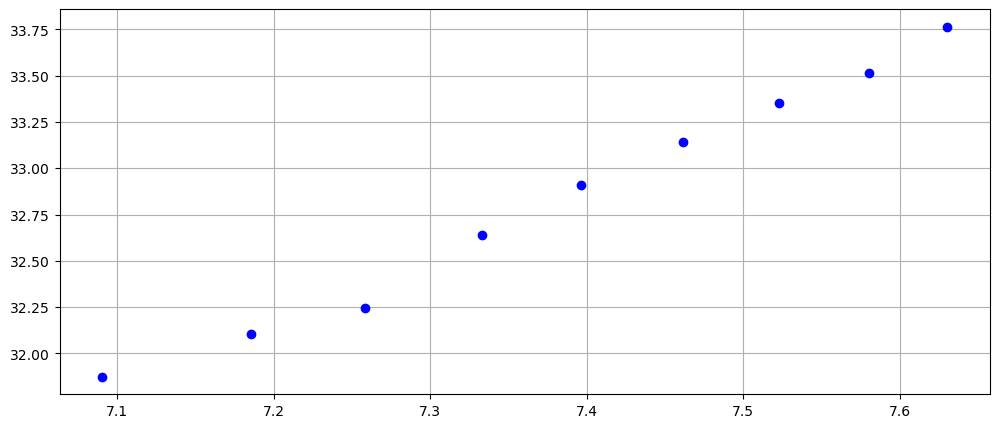

In [1]:
import numpy as np
import matplotlib.pyplot as plt
I = [0.75 , 0.82 , 0.9 , 1.05 , 1.19 , 1.32 , 1.41 , 1.58 , 1.75]
U = [25.2 , 31.5 , 37.6 , 52.2 , 65.5 , 80.1 , 104.5 , 115.5 , 133.8]
B = 5.67 * 0.36 *1e-12
W = [I[i]*U[i] for i in range(len(I))]
print(W)
T = [1200,  1320,  1420,  1530, 1630,  1740,   1850, 1960, 2060]
E_t=[0.133, 0.144, 0.164, 0.179, 0.195, 0.209, 0.236, 0.249, 0.249]
lnW = np.log(W)
lnT = np.log(T)
EtB = [B * i for i in E_t]
lnEtB = np.log(EtB)

dT = 10
dI = 0.01
dU = 0.2
dW = [np.sqrt((dT/T[i])**2 + (dU/U[i])**2) for i in range(len(T))]

plt.figure(figsize = (12, 5))
plt.plot(lnT, lnW - lnEtB, 'bo')
plt.grid()
plt.show()

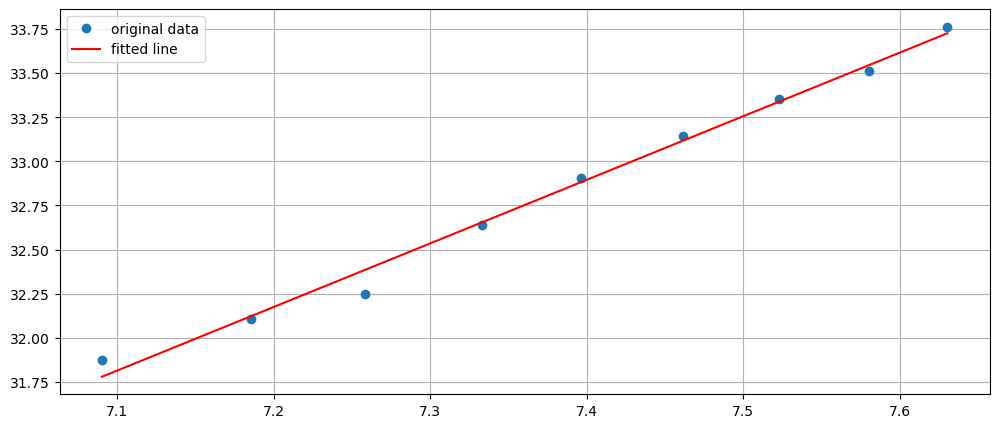

In [2]:
# Нахождение показателя температуры
from scipy import stats

x = lnT[:]
y = (lnW - lnEtB)[:]
dx = x*dT/T
dy = y*dW/W

res = stats.linregress(x, y)

plt.figure(figsize = (12, 5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.grid()
plt.legend()
plt.show()

In [5]:
class myMNK:
    def __init__(self, x, y):
        x = np.array(x)
        y = np.array(y)
        x_mean = sum(x)/ len(x) 
        y_mean = sum(y)/ len(y) 
        xy_mean = np.dot(x.T, y)/len(x)
        x2_mean = np.dot(x.T, x)/len(x)
        y2_mean = np.dot(y.T, y)/len(y)
        k = (xy_mean - x_mean*y_mean)/(x2_mean - x_mean**2)
        b = y_mean - k*x_mean
        dk = np.sqrt((y2_mean - y_mean**2)/(x2_mean - x_mean**2) - k**2)/np.sqrt(len(x))
        db = dk*np.sqrt(x2_mean - x_mean**2)
        self.k = k
        self.b = b
        self.dk = dk
        self.db = db
        
        
    def printFunc(self):
        print(f'({round(self.k, 3)}+-{round(self.dk, 3)})*x + {round(self.b, 3)}+-{round(self.db, 3)}')
    
    def __call__(self, *x):
        return [self.k*t + self.b for t in x]
    
#     def __sub__(self, other):
#         return myMNK(self.k - other.k, self.b - other.b)
    
#     def __rsub__(self, other):
#         return myMNK(other.k - self.k, other.b - self.b)

(3.605+-0.116)*x + 6.216+-0.02
[31.87405132 32.10696183 32.24701563 32.64172538 32.90824242 33.14381186
 33.3541835  33.51448101 33.76374756]
[0.01940765 0.01228661 0.0084099  0.00451194 0.00289325 0.00196423
 0.00129804 0.00098949 0.00073242]


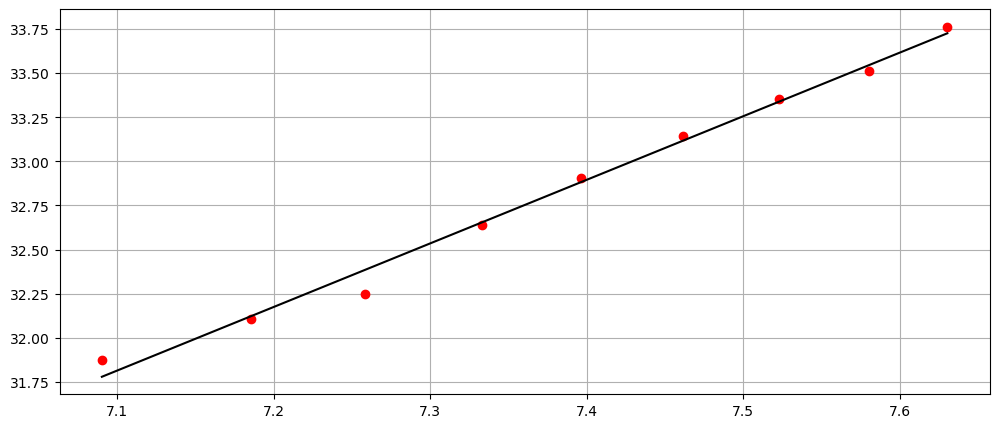

In [6]:
f = myMNK(x, y)
f.printFunc()
# print(f'{x_mean = }, {y_mean = }, {xy_mean = }, {x2_mean = }')
print(y)
print(dy)

plt.figure(figsize = (12, 5))
plt.plot(x, y, 'ro')
# plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='o-', ecolor='red')
plt.plot(x, f.k*x + f.b, 'k')
plt.grid()
plt.show()